#### 다양한 모델을 결합한 ensemble (앙상블)
- 앙상블
- 다수결 투표 앙상블(Voting)
- 배깅(Bagging)
- 에이다부스트(AdaBoost)
- 그레이던트 부스팅 & XGBoost
- 모델성능 평가 및 비교

- 단일모델의 한계가 있음
    - 과대적합(overfitting) : 학습데이터에 너무 잘 맞춰져있어 새로운 데이터에 대한 성능 저하
    - 과소적합(Underfitting) : 모델이 너무 단순해서 제대로된 합습이 안되어 성능 저하
    - 높은 분산(Hight Variance) : 학습데이터가 조금만 바뀌어도 모델이 크게 달라지는 현상
    - 높은 편향(Hight Bias) : 모델이 진짜 패턴을 포착하지 못하는 현상

#### 앙상블이란
- 여러 개의 모델을 하나로 합쳐서 더 똑똑한 예측을 하는 방법
- 앙상블 요소별 역할
    - 배깅 : 같은 알고리즘 ,  다른 데이터셋(부트스트랩)               RandomFores         분산 감소
    - 부스팅 : 약한 모델을 계속 밀어 올려서 강한 모델로 만든다”는 뜻  AdaBoost , XGBoost  편향감소
    - 스태깅 : 다른 알고리즘을메타 모델로 학습                        Stacking            일반화 성능 업

- Voting
    - Hard Voting : 다수결 투표 (확률정보가 손실될 가능성이 있음)
        - A : 고양이로 예측
        - B : 강아지로 예측
        - C : 고양이로 예측
        - D : 고양이로 예측
    - Soft Voting : 가중치 투표 - 확률을 보고 결정하며 보통Hard Voting보다 성능이 좋음 (성능이 좋으면 Soft Voting을 주로 사용함)
        - 고양이 , 강아지
        - A : (0.9 , 0.1)
        - B : (0.3 , 0.7)
        - C : (0.6 , 0.4)
        - D : (0.2 , 0.8)
        - 평균 확률 : 고양이 50% : 강아지 50% → 무승부 상태

- bagging (Bagging - Boostrap(훈련세트만들기) Aggregation(예측결과집계) )
    - Boostrap : 원본데이터 1000 이면 중복을 허용해서 1000 뽑아 훈련세트1 을 만듬.
        - Boostrap : 훈련세트1을 만들어 모델1번 학습시키고, 훈련세트2를 만들어 모델2번 학습시키는 형식.
        - Aggregation : 순차적으로 학습을 하고 난 후 여러개의 모델들을 투표(Voting)해서 최종 결론을 내림
    - 대표 모델은 RandomForest
    - 효과 : 과적합을 방지함 즉, 모델의 분산을 줄여줌

- Boosting
    - 모델들이 순서대로 학습 ,  앞 모델의 실수를 뒷 모델이 보완
        - 모델1번이 전체 데이터로 학습하고 예측 -> 모델1번이 틀린 문제를 찾음 -> 틀린 문제를 더 높은 가중치(중요도)를 부여
        - 모델2번이 틀리기 쉬운 문제들을 좀 더 학습 -> 모델2번이 틀린 문제를 찾음
        - 모델3번이 모델1번+2번 틀린 문제에 집중 -> 가중치(중요도) 부여
        - 위 과정을 반복
    - 결론 : 예측을 합쳐서 성적이 더 좋은 모델의 가중치를 부여해서 최종 결론을 내린다. 편향을 줄여준다. Bias
    
- Stacking
    - 1. base model : 여러개의 모델을 훈련.
    - 2. meta model : 1단계 모델들이 예측한 값들을 모아서 훈련데이터로 사용함.
    - 결론 : 새로운 데이터를 최종모델(Meta-Model)(예 로지스틱) 을 이용해서 결론 도출함

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

X,y = make_classification(n_samples=500 , n_features=2 , random_state=42 , n_redundant=0, n_clusters_per_class=1)# "가짜 분류 데이터 생성기"
np.unique(y,return_counts=True) , X.shape
x_train, x_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

# 개별 모델 생성
lr = LogisticRegression()
svm = SVC(random_state=42,probability=True)
knn = KNeighborsClassifier()

lr.fit(x_train, y_train); svm.fit(x_train, y_train); knn.fit(x_train, y_train); #보팅과 비교하기 위해 작성된 구문

# Voting ensemble
Voting_hard = VotingClassifier(estimators=[('lr',lr),('svm',svm),('knn',knn)],voting='hard')
Voting_soft = VotingClassifier(estimators=[('lr',lr),('svm',svm),('knn',knn)],voting='soft')


Voting_hard.fit(x_train, y_train)
Voting_soft.fit(x_train, y_train)


models = [('lr',lr),('svm',svm),('knn',knn),('Voting_soft',Voting_soft),('Voting_hard',Voting_hard)]

for label, model in models:
    print(f'{label} : {model.score(x_test,y_test)}')


lr : 0.8466666666666667
svm : 0.9266666666666666
knn : 0.96
Voting_soft : 0.94
Voting_hard : 0.9333333333333333


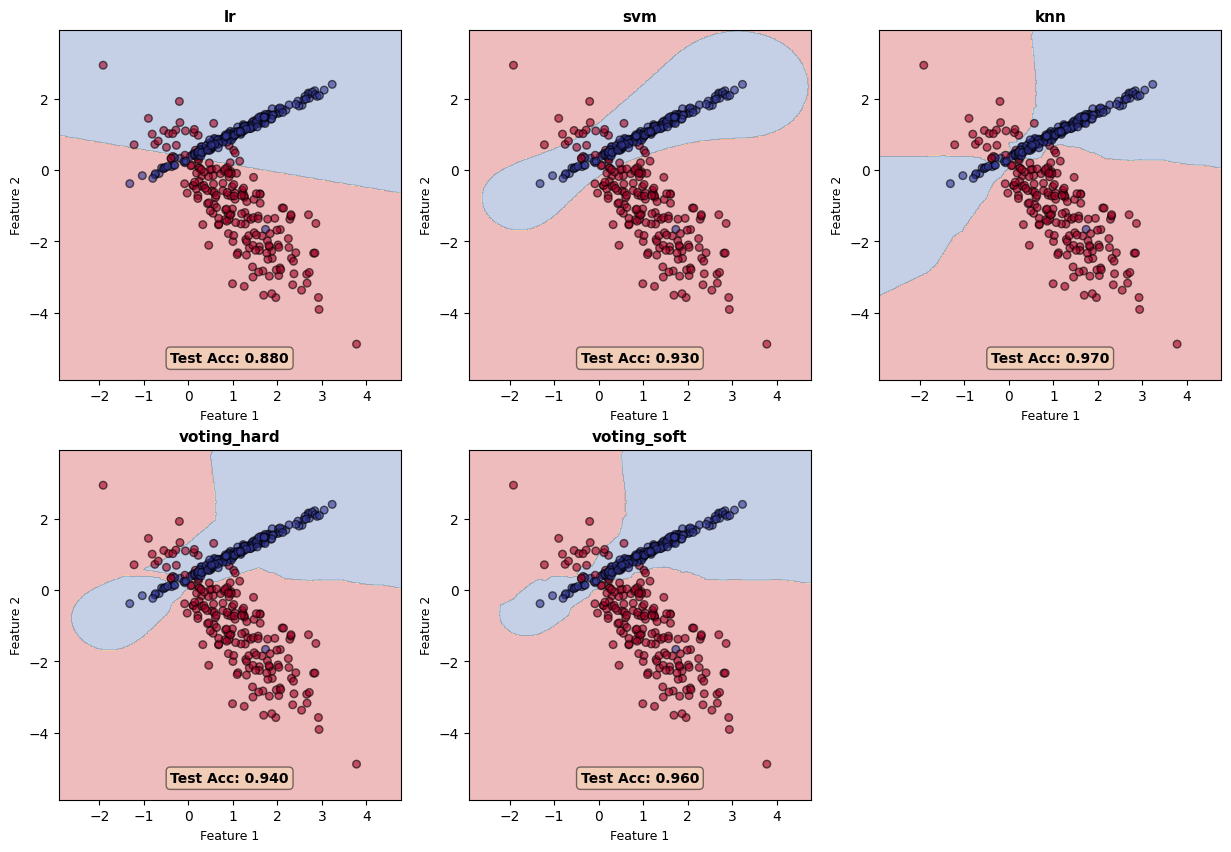

In [6]:
# 데이터 생성
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pylab as plt

X,y =  make_classification(n_samples=500, n_features=2,random_state=42,n_redundant=0,n_clusters_per_class=1)
np.unique(y,return_counts=True), X.shape
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 개별모델 생성 학습
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42,probability=True)
knn = KNeighborsClassifier()
lr.fit(x_train,y_train) ; svm.fit(x_train,y_train) ; knn.fit(x_train,y_train)


# 보팅 앙상블
voting_hard = VotingClassifier(estimators=[('lr',lr),('svm',svm),('knn',knn)],voting='hard')
voting_soft = VotingClassifier(estimators=[('lr',lr),('svm',svm),('knn',knn)],voting='soft')

voting_hard.fit(x_train, y_train)
voting_soft.fit(x_train, y_train)

models  = [
    ('lr',lr),
    ('svm',svm),
    ('knn',knn),
    ('voting_hard',voting_hard),
    ('voting_soft',voting_soft)
           ]

# 결정 경계 시각화
def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
              edgecolor='black', s=30, alpha=0.6)
    ax.set_title(title, fontsize=11, weight='bold')
    ax.set_xlabel('Feature 1', fontsize=9)
    ax.set_ylabel('Feature 2', fontsize=9)

# 5개 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (title ,model) in enumerate(models):
  row = idx // 3
  col = idx % 3
  plot_decision_boundary(model, x_train, y_train, title, axes[row, col])

  # 정확도 표시
  score = model.score(x_test, y_test)
  axes[row, col].text(0.5, 0.05, f'Test Acc: {score:.3f}',
                      transform=axes[row, col].transAxes,
                      ha='center', fontsize=10, weight='bold',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 마지막 서브플롯 제거
axes[1, 2].remove()

In [7]:
# 어떤 모델들을 조합하면 더 좋을까?
# 다양성이 중요 : 서로 다른 가정을 가진 모델 조합
# 선형모델 + 비선형모델 + 인스턴스기반(KNN)
# 비슷한 모델끼리 조합하는건 비효율적임

### Bagging

- Bootstrap Aggreating
- 같은 알고리즘을 다른 데이터셋 (부트스트랩 샘플)오 여러번 학습시켜 결합
- Random Forest


(178, 13) (178,)


MemoryError: Unable to allocate 2.09 GiB for an array with shape (280599740,) and data type int64

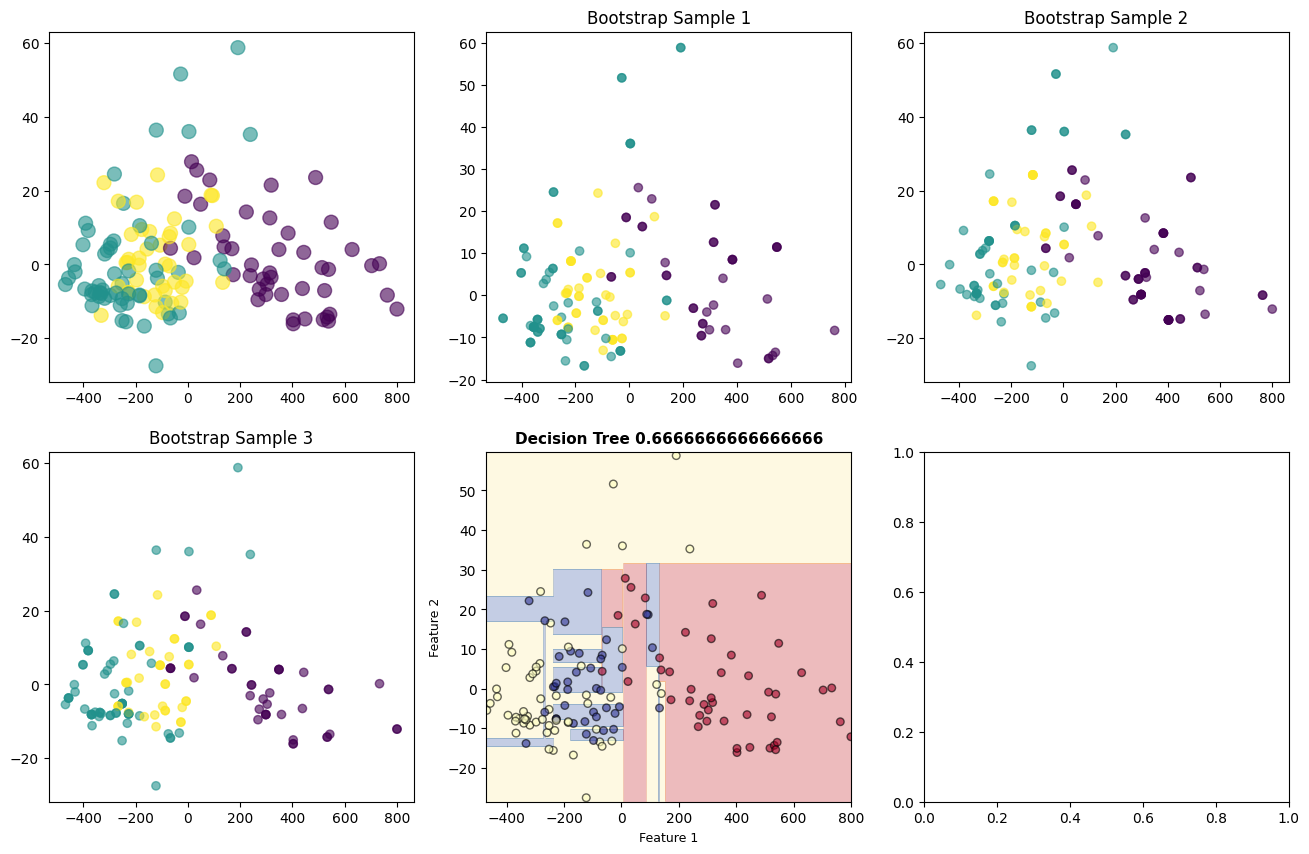

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X , y = load_wine(return_X_y=True)
print(X.shape , y.shape)
# X → 178개의 샘플(와인)이 있고, 각 샘플마다 13개의 특징(feature)이 있다.
# y → 178개의 라벨(정답, 와인 종류)이 있다.

X_pca = PCA(n_components=2,random_state=42).fit_transform(X)
x_train , x_test , y_train , y_test = train_test_split(X_pca , y , test_size=0.2 , random_state=42)

# 모델만들기
tree = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42) , n_estimators=100 , random_state=42)

tree.fit(x_train , y_train)
bagging.fit(x_train,y_train)

fig = plt.figure(figsize=(16,10))

# 1. 원본데이터
ax1 = plt.subplot(2,3,1)
ax1.scatter(x_train[:,0] , x_train[:,1] , c=y_train , s=100 , alpha=0.6,cmap='viridis')

# 부트스트랩 샘플3
np.random.seed(42)
for i in range(3):
    ax = plt.subplot(2,3,i+2)
    # 부트스트랩 샘플링
    n_samples = len(x_train)
    bootstrap_index = np.random.choice(n_samples, size=n_samples , replace=True)
    x_boot = x_train[bootstrap_index]
    y_boot = y_train[bootstrap_index]
    ax.scatter(x_boot[:,0] , x_boot[:,1] , c=y_boot , alpha=0.6 , cmap='viridis')
    ax.set_title(f'Bootstrap Sample {i+1}')

ax5 = plt.subplot(2,3,5)
plot_decision_boundary(tree, x_train , y_train , f'Decision Tree {tree.score(x_test , y_test)}' , ax5)

ax6 = plt.subplot(2,3,6)
plot_decision_boundary(bagging, x_train , y_train , f'Bagging {tree.score(x_test , y_test)}' , ax6)
plt.show()




#### 에이다 부스트(AdaBoost)
- 약한 학습기들을 순차적으로 결합해서 강한 학습기를 만듬
    - 이전 모델이 틀린 샘플에 더 집중
    - 각 모델은 이전 모델의 실수를 보완
    - 편향 감소가 주요 목표
- 배깅 vs 부스팅
    - 학습방식 병렬(독립적)   /  순차적(의존성)
    - 샘플       부트스트랩  /  가중치 조정
    - 대표   RandomForest   /  AdaBoost , GradientBoosting , XGBoost
- 작동원리 (AdaBoost)
    - 모든 샘플에 동일한 가중치 부여
    - 약한 학습기 학습
    - 잘못 분류된 샘플의 가중치 증가
    - 반복
    - 최종적으로 모든 학습기를 가중 목표로 결합

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.92      0.98      0.95        49

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90

train : 0.8762 / test : 0.9444


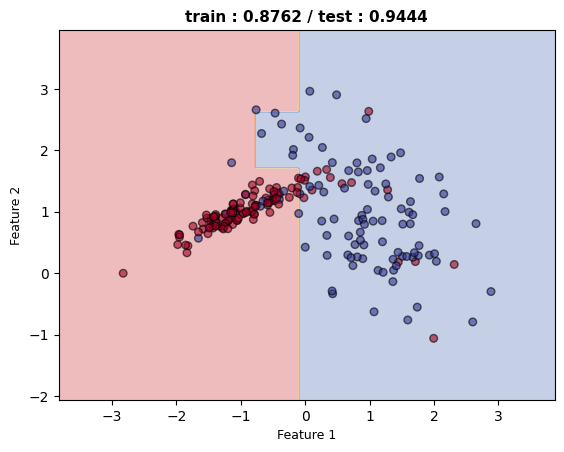

In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

np.random.seed(42)
X,y = make_classification(n_samples = 300, n_features=2, n_redundant=0,n_informative=2, 
n_clusters_per_class=1, flip_y=0.1,random_state=42)

x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.3, random_state=42)

ada =  AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)
ada.fit(x_train, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, ada.predict(x_test))   )
title = f'train : {ada.score(x_train,y_train):.4f} / test : { ada.score(x_test, y_test):.4f}' 
print( title  )

# 결정경계
ax = plt.subplot(1,1,1)
plot_decision_boundary(ada, x_train, y_train, title, ax)

(178, 13) (178,)


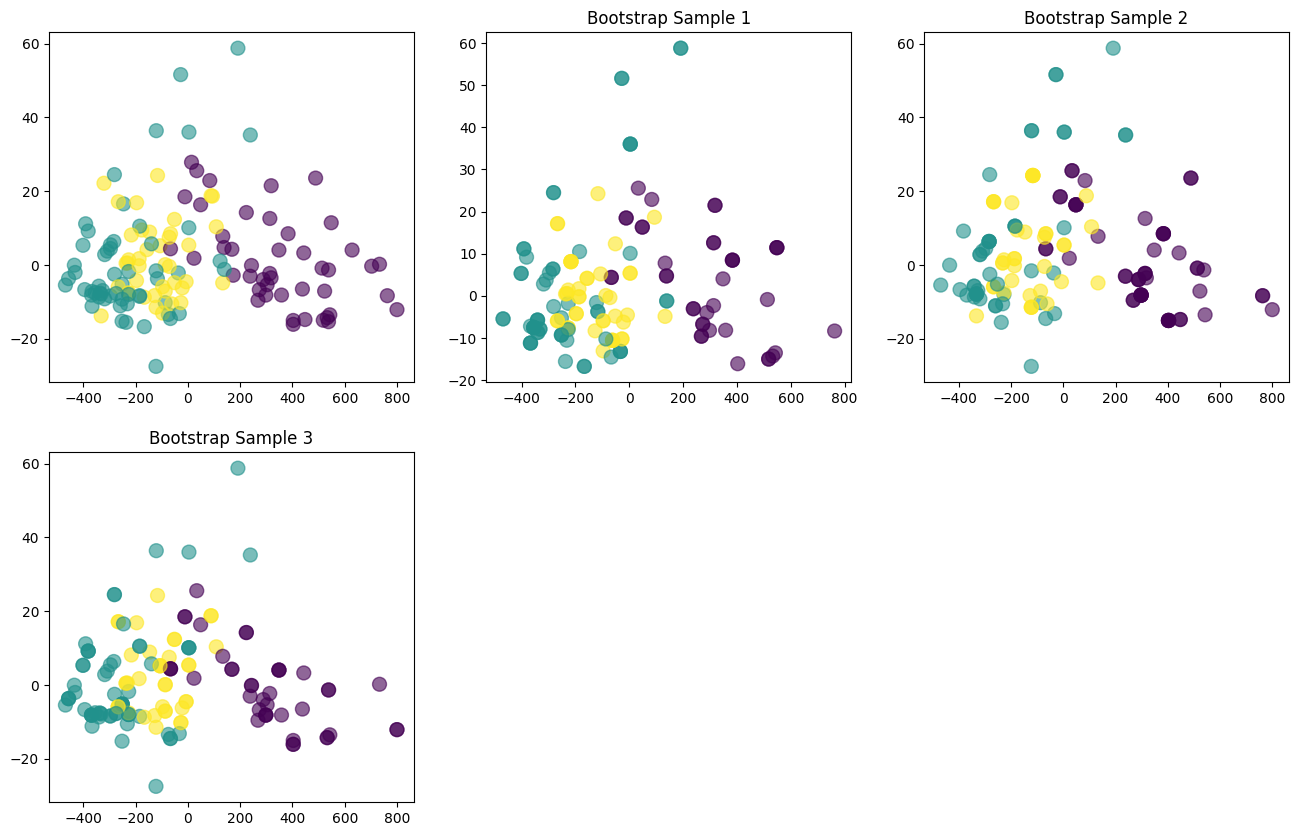

In [18]:
X, y = load_wine(return_X_y=True)
print(X.shape, y.shape)

# 시각화를 위해서
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#모델정의
tree = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=100, random_state=42)
# 학습
tree.fit(x_train, y_train)
bagging.fit(x_train, y_train)

fig =  plt.figure(figsize=(16, 10))
# 1,원본데이터
ax1 =  plt.subplot(2,3,1)
ax1.scatter(x_train[:,0], x_train[:,1], c = y_train,s=100,alpha = 0.6, cmap='viridis')

# 부트스트랩 샘플3
np.random.seed(42)
for i in range(3):
  ax = plt.subplot(2,3,i+2)
  # 부트스트랩 샘플링
  n_samples = len(x_train)
  bootstrap_index = np.random.choice(n_samples, size=n_samples, replace=True)
  x_boot = x_train[bootstrap_index]
  y_boot = y_train[bootstrap_index]
  ax.scatter(x_boot[:,0], x_boot[:,1], c = y_boot,s=100,alpha = 0.6, cmap='viridis')
  ax.set_title(f'Bootstrap Sample {i+1}')

plt.show()

In [20]:
# 결정 경계 시각화
def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
              edgecolor='black', s=30, alpha=0.6)
    ax.set_title(title, fontsize=11, weight='bold')
    ax.set_xlabel('Feature 1', fontsize=9)
    ax.set_ylabel('Feature 2', fontsize=9)

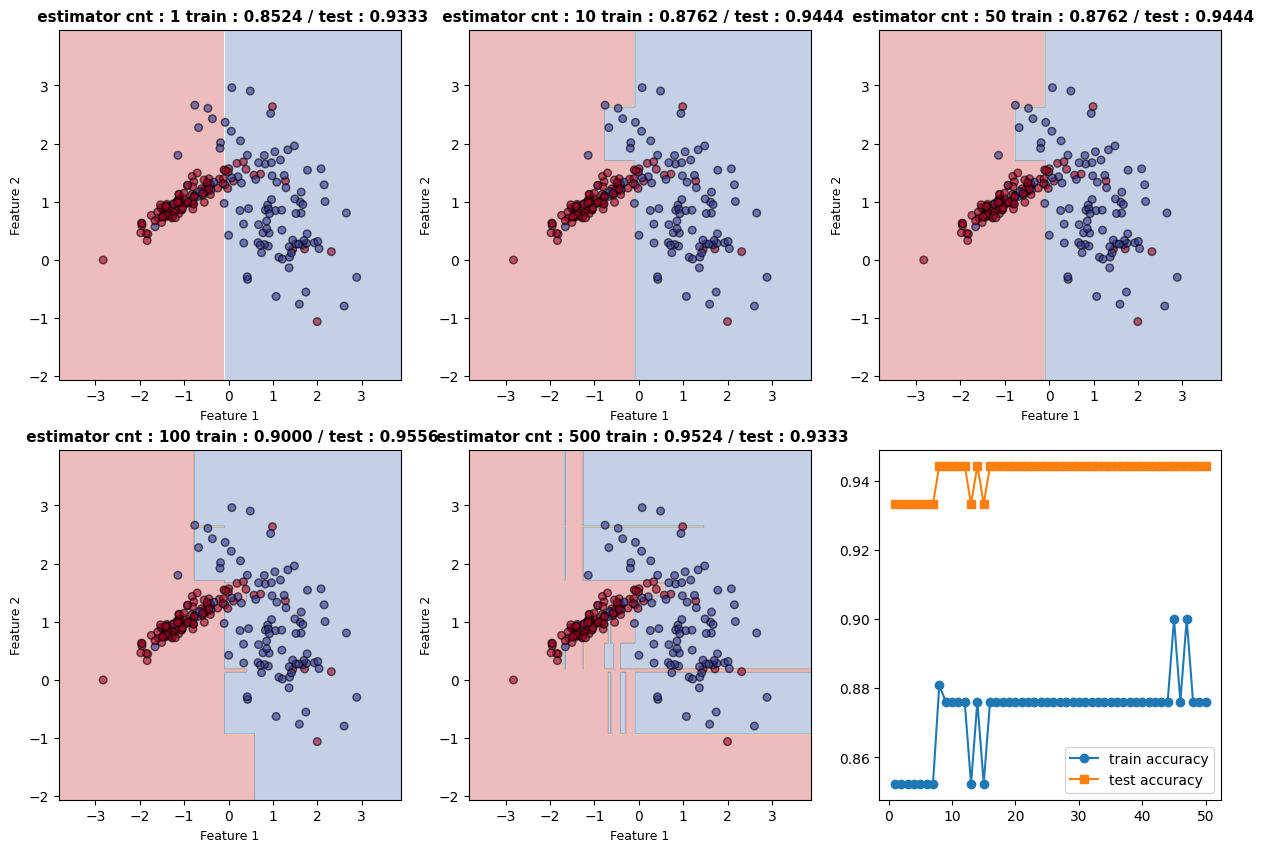

In [21]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

np.random.seed(42)
X,y = make_classification(n_samples = 300, n_features=2, n_redundant=0,n_informative=2, 
n_clusters_per_class=1, flip_y=0.1,random_state=42)

x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.3, random_state=42)

fig,axes = plt.subplots(2,3,figsize=(15,10))
n_estimators_lists = [1,10,50,100,500]

for idx, n_est in enumerate(n_estimators_lists):
    ada =  AdaBoostClassifier(
        estimator = DecisionTreeClassifier(max_depth=1),
        n_estimators = n_est,
        learning_rate = 1.0,
        random_state = 42
    )
    ada.fit(x_train, y_train)

    # print(classification_report(y_test, ada.predict(x_test))   )
    title = f' estimator cnt : {n_est} train : {ada.score(x_train,y_train):.4f} / test : { ada.score(x_test, y_test):.4f}' 
    # print( title  )

    # 결정경계    
    plot_decision_boundary(ada, x_train, y_train, title, axes[idx // 3 , idx % 3 ])

# 학습곡선
train_score, test_score = [],[]
n_range = range(1,51) 
for n in n_range:
    temp = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators = n,
    learning_rate = 1.0,
    random_state = 42
    )
    temp.fit(x_train, y_train)
    train_score.append(temp.score(x_train, y_train))
    test_score.append(temp.score(x_test, y_test))
axes[1,2].plot(n_range,train_score,label = 'train accuracy', marker='o')
axes[1,2].plot(n_range,test_score,label = 'test accuracy', marker='s')
axes[1,2].legend()
    

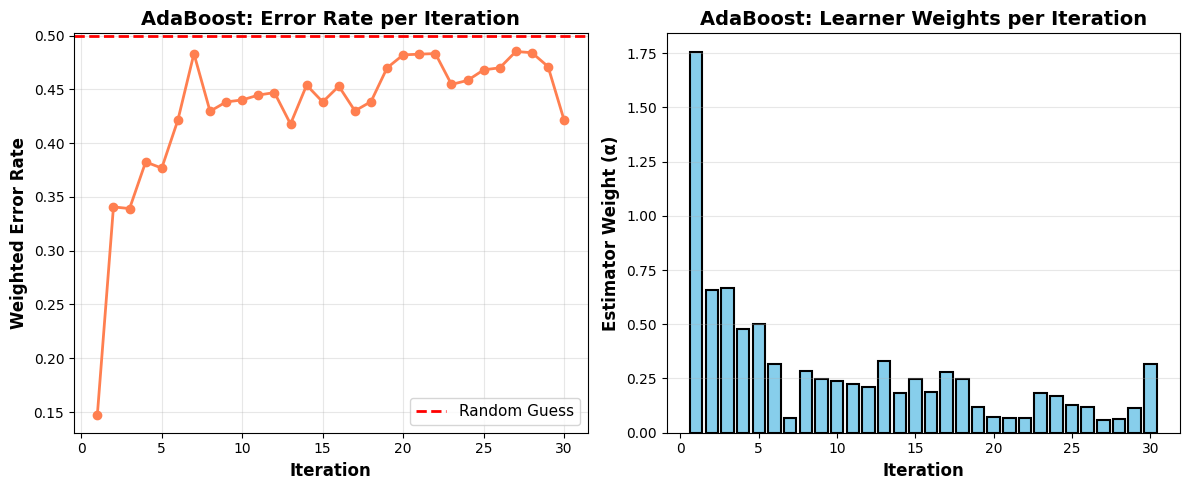

ADABOOST ANALYSIS
Number of Estimators: 500
Training Accuracy: 0.9524
Test Accuracy: 0.9333

First 10 Estimator Errors:
  Round  1: 0.1476
  Round  2: 0.3407
  Round  3: 0.3391
  Round  4: 0.3825
  Round  5: 0.3768
  Round  6: 0.4213
  Round  7: 0.4831
  Round  8: 0.4296
  Round  9: 0.4383
  Round 10: 0.4401

Last 10 Estimator Errors:
  Round  1: 0.4721
  Round  2: 0.4926
  Round  3: 0.4807
  Round  4: 0.4814
  Round  5: 0.4709
  Round  6: 0.4725
  Round  7: 0.4820
  Round  8: 0.4877
  Round  9: 0.4822
  Round 10: 0.4723

Last 10 Estimator Weights:
  Round  1: 0.1117
  Round  2: 0.0296
  Round  3: 0.0772
  Round  4: 0.0744
  Round  5: 0.1165
  Round  6: 0.1101
  Round  7: 0.0722
  Round  8: 0.0493
  Round  9: 0.0711
  Round 10: 0.1108


In [22]:
# 오차 감소 시각화
plt.figure(figsize=(12, 5))

# 왼쪽: 단계별 오차율
plt.subplot(1, 2, 1)
estimator_errors = ada.estimator_errors_[:30]  # 처음 30개만
plt.plot(range(1, len(estimator_errors) + 1), estimator_errors, 
         marker='o', linewidth=2, markersize=6, color='coral')
plt.axhline(y=0.5, color='r', linestyle='--', label='Random Guess', linewidth=2)
plt.xlabel('Iteration', fontsize=12, weight='bold')
plt.ylabel('Weighted Error Rate', fontsize=12, weight='bold')
plt.title('AdaBoost: Error Rate per Iteration', fontsize=14, weight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# 오른쪽: 학습기 가중치
plt.subplot(1, 2, 2)
estimator_weights = ada.estimator_weights_[:30]
plt.bar(range(1, len(estimator_weights) + 1), estimator_weights, 
        color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel('Iteration', fontsize=12, weight='bold')
plt.ylabel('Estimator Weight (α)', fontsize=12, weight='bold')
plt.title('AdaBoost: Learner Weights per Iteration', fontsize=14, weight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('adaboost_errors_weights.png', dpi=150, bbox_inches='tight')
plt.show()

print("=" * 70)
print("ADABOOST ANALYSIS")
print("=" * 70)
print(f"Number of Estimators: {ada.n_estimators}")
print(f"Training Accuracy: {ada.score(x_train, y_train):.4f}")
print(f"Test Accuracy: {ada.score(x_test, y_test):.4f}")
print(f"\nFirst 10 Estimator Errors:")
for i, error in enumerate(ada.estimator_errors_[:10], 1):
    print(f"  Round {i:2d}: {error:.4f}")

print(f"\nLast 10 Estimator Errors:")
for i, error in enumerate(ada.estimator_errors_[-10:], 1):
    print(f"  Round {i:2d}: {error:.4f}")


print(f"\nLast 10 Estimator Weights:")
for i, weight in enumerate(ada.estimator_weights_[-10:], 1):
    print(f"  Round {i:2d}: {weight:.4f}")
print("=" * 70)